In [166]:
import sys
project_path = '/home/kuba/Projects/kursy/uwr-kursy/wavelets-project'
sys.path.append(project_path + '/src')
images_path = project_path + '/data/101_ObjectCategories/'

from helpers import helpers
import numpy as np
import pywt
from dwt_search import *
from scipy.misc import imread, imshow

In [167]:
project_path = '/home/kuba/Projects/kursy/uwr-kursy/wavelets-project'
images_path = project_path + '/data/101_ObjectCategories/'
image_categories = ['butterfly/', 'platypus/', 'lobster/', 'dolphin/']
example_images = [imread(images_path + c + '/image_000{}.jpg'.format(i)) for i in range(1,6) for c in image_categories]
drawn_images = [imread(project_path + '/data/{}.jpg'.format(i)) for i in range(6)]

nautilus_idxs = [15, 21, 23, 24, 25]
nautilus_img = imread(images_path + 'nautilus/image_000{}.jpg'.format(9))
nautilus_imgs = [nautilus_img]+ [imread(images_path + 'nautilus/image_00{}.jpg'.format(i)) for i in nautilus_idxs]

example_images = example_images + nautilus_imgs

In [168]:
coeff_transformer = WaveletCoefficientTransformer(3, 'haar', 'symmetric', 1)
thresholder = ThresholdTransformer(1000, binary=True)
weights = np.dstack([np.ones((128, 128)) for __ in range(3)])
iqm = ImageQueryingMetric(coeff_transformer, thresholder, (256, 256), weights)

iqm.fit(example_images)

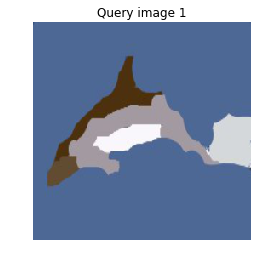

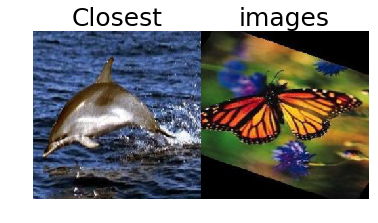

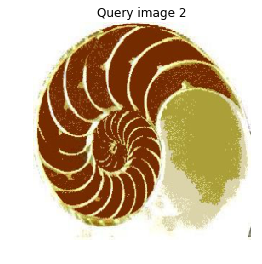

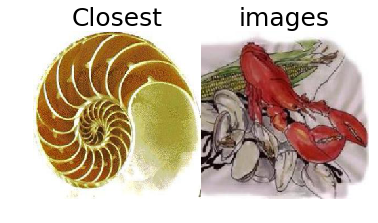

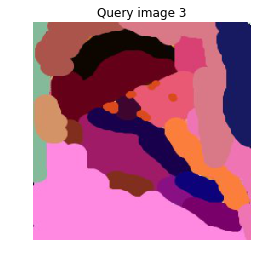

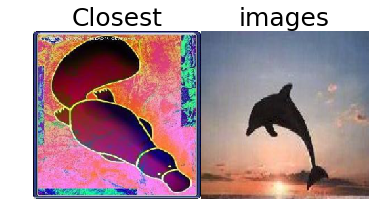

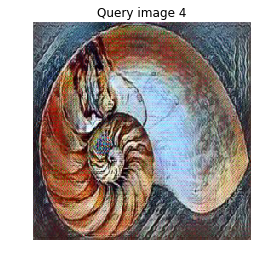

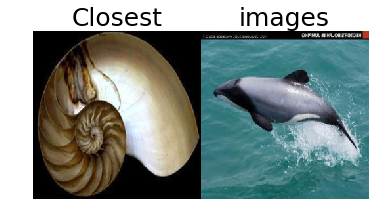

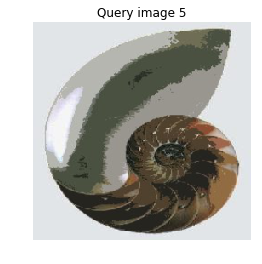

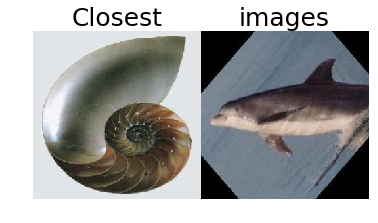

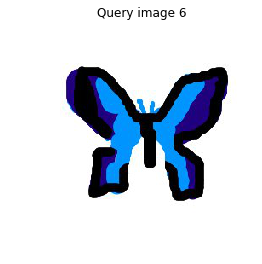

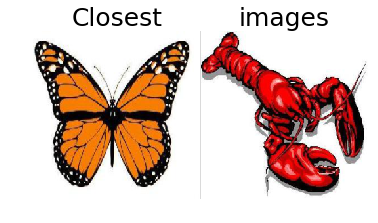

In [169]:
for i, img in enumerate(drawn_images):
  plt.imshow(imresize(img, (256, 256)))
  plt.title('Query image {}'.format(i+1))
  plt.axis('off')
  plt.show()
  img_indices, __ = iqm.predict_single(img, 2)
  imgs = [imresize(example_images[i], (256, 256)) for i in img_indices]

  helpers.plot_linear_layout(imgs, ['Closest', 'images'])